**ЛР 2: Классификация курящих людей**

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
display(df.head())

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55.0,150.0,50.0,73.0,0.8,1.0,1.0,1.0,122.0,...,62.0,113.0,12.0,1.0,0.6,22.0,21.0,12.0,0.0,0.0
1,1,50.0,160.0,60.0,79.6,1.0,0.8,1.0,1.0,124.0,...,74.0,112.0,14.1,1.0,0.9,19.0,14.0,17.0,0.0,0.0
2,2,55.0,145.0,50.0,73.0,1.2,1.2,1.0,1.0,110.0,...,66.0,123.0,13.3,1.0,0.6,15.0,12.0,13.0,0.0,0.0
3,3,40.0,175.0,80.0,83.2,0.9,1.0,1.0,1.0,99.0,...,38.0,114.0,16.1,1.0,1.0,22.0,13.0,20.0,0.0,1.0
4,4,30.0,170.0,70.0,79.5,1.2,1.2,1.0,1.0,119.0,...,49.0,148.0,15.5,1.0,1.2,18.0,19.0,25.0,0.0,1.0


In [5]:
display(df_test.head())

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,15000,40.0,155.0,45.0,64.0,0.9,0.9,1.0,1.0,109.0,...,50.0,79.0,108.0,13.3,1.0,0.9,16.0,11.0,17.0,0.0
1,15001,45.0,175.0,90.0,101.0,1.0,1.2,1.0,1.0,130.0,...,147.0,38.0,99.0,16.2,1.0,0.9,23.0,21.0,28.0,1.0
2,15002,40.0,165.0,60.0,78.0,1.5,1.5,1.0,1.0,107.0,...,60.0,67.0,136.0,14.9,1.0,0.9,30.0,36.0,16.0,0.0
3,15003,35.0,170.0,60.0,84.5,1.0,1.0,1.0,1.0,124.0,...,127.0,63.0,128.0,15.4,1.0,0.8,21.0,17.0,26.0,1.0
4,15004,40.0,155.0,45.0,68.5,1.0,1.0,1.0,1.0,109.0,...,47.0,61.0,133.0,11.5,1.0,0.7,22.0,12.0,17.0,0.0


**Проведем разведочный анализ данных**

In [7]:
none_values = df.isna().sum()
none_percent = (none_values / len(df)) * 100
print(none_percent)

id                     0.0
age                    0.0
height(cm)             0.0
weight(kg)             0.0
waist(cm)              0.0
eyesight(left)         0.0
eyesight(right)        0.0
hearing(left)          0.0
hearing(right)         0.0
systolic               0.0
relaxation             0.0
fasting blood sugar    0.0
Cholesterol            0.0
triglyceride           0.0
HDL                    0.0
LDL                    0.0
hemoglobin             0.0
Urine protein          0.0
serum creatinine       0.0
AST                    0.0
ALT                    0.0
Gtp                    0.0
dental caries          0.0
smoking                0.0
dtype: float64


In [8]:
none_values = df_test.isna().sum()
none_percent = (none_values / len(df)) * 100
print(none_percent)

id                     0.0
age                    0.0
height(cm)             0.0
weight(kg)             0.0
waist(cm)              0.0
eyesight(left)         0.0
eyesight(right)        0.0
hearing(left)          0.0
hearing(right)         0.0
systolic               0.0
relaxation             0.0
fasting blood sugar    0.0
Cholesterol            0.0
triglyceride           0.0
HDL                    0.0
LDL                    0.0
hemoglobin             0.0
Urine protein          0.0
serum creatinine       0.0
AST                    0.0
ALT                    0.0
Gtp                    0.0
dental caries          0.0
dtype: float64


Заметим отсутствие нулевых столбцов, не нужно обрабаьывать нулевые ячейки и отстутвие категориальных признаков

In [9]:
print(df.describe())

                 id           age    height(cm)    weight(kg)     waist(cm)  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean    7499.500000     42.606000    164.672667     64.282000     80.323180   
std     4330.271354     10.415341      8.558684     10.973871      7.932701   
min        0.000000     20.000000    140.000000     35.000000      0.900000   
25%     3749.750000     40.000000    160.000000     55.000000     75.000000   
50%     7499.500000     40.000000    165.000000     65.000000     80.000000   
75%    11249.250000     50.000000    170.000000     70.000000     86.000000   
max    14999.000000     80.000000    190.000000    120.000000    121.000000   

       eyesight(left)  eyesight(right)  hearing(left)  hearing(right)  \
count    15000.000000     15000.000000   15000.000000    15000.000000   
mean         1.032727         1.025927       1.005533        1.004933   
std          0.312845         0.313488       0.074183        0.070067

In [10]:
print(df_test.describe())

                id           age    height(cm)    weight(kg)     waist(cm)  \
count  10000.00000  10000.000000  10000.000000  10000.000000  10000.000000   
mean   19999.50000     42.690000    164.737500     64.343000     80.355780   
std     2886.89568     10.476873      8.574436     11.110612      7.995454   
min    15000.00000     20.000000    140.000000     40.000000     58.000000   
25%    17499.75000     40.000000    160.000000     55.000000     75.000000   
50%    19999.50000     40.000000    165.000000     65.000000     80.200000   
75%    22499.25000     50.000000    170.000000     70.000000     86.000000   
max    24999.00000     80.000000    185.000000    110.000000    114.000000   

       eyesight(left)  eyesight(right)  hearing(left)  hearing(right)  \
count    10000.000000     10000.000000   10000.000000     10000.00000   
mean         1.033340         1.030660       1.005300         1.00580   
std          0.300535         0.301209       0.072612         0.07594   
min  

**Визуализируем данные**

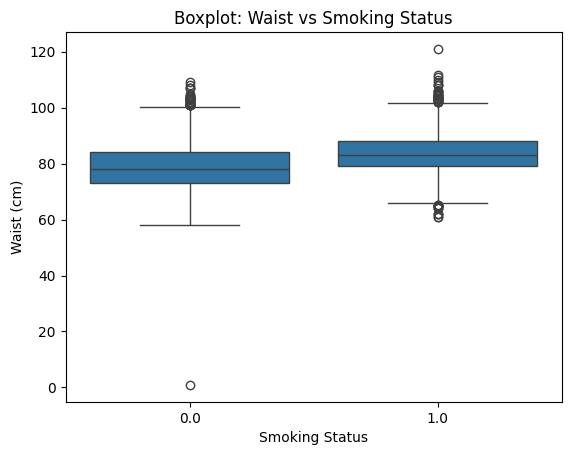

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='smoking', y='waist(cm)', data=df)

plt.title('Boxplot: Waist vs Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Waist (cm)')

plt.show()

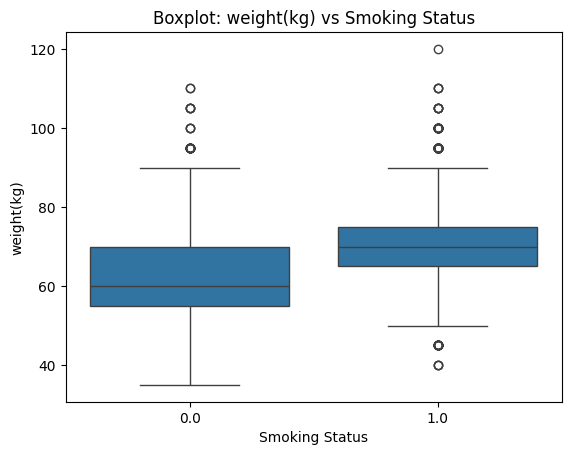

In [13]:
sns.boxplot(x='smoking', y='weight(kg)', data=df)

plt.title('Boxplot: weight(kg) vs Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('weight(kg)')

plt.show()

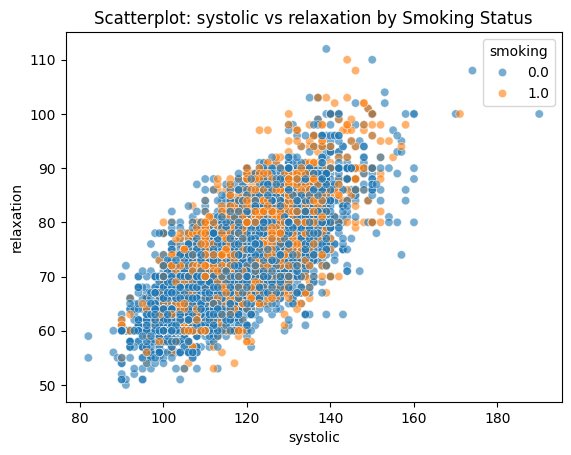

In [14]:
sns.scatterplot(x='systolic', y='relaxation', hue='smoking', data=df, alpha=0.6)

plt.title('Scatterplot: systolic vs relaxation by Smoking Status')
plt.xlabel('systolic')
plt.ylabel('relaxation')

plt.show()

Заметим что у курильщика с большей вероятностью повышенное давление

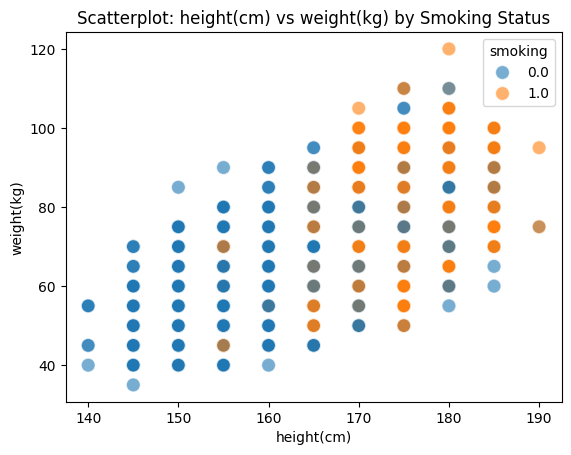

In [16]:
sns.scatterplot(
    x='height(cm)', 
    y='weight(kg)', 
    hue='smoking', 
    data=df, 
    alpha=0.6, 
    s=100  # размер точек (по умолчанию примерно 40)
)

plt.title('Scatterplot: height(cm) vs weight(kg) by Smoking Status')
plt.xlabel('height(cm)')
plt.ylabel('weight(kg)')
plt.show()

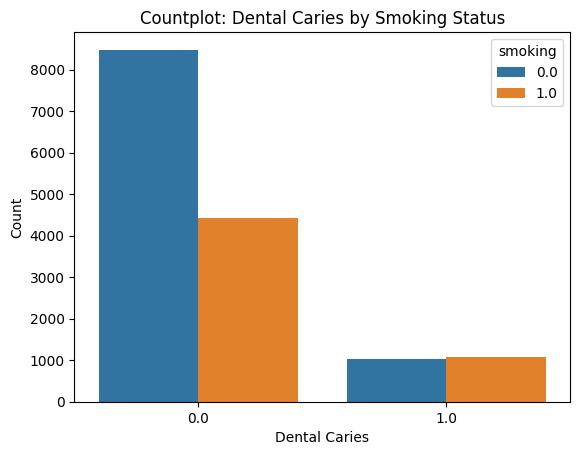

In [19]:
sns.countplot(x='dental caries', hue='smoking', data=df)

plt.title('Countplot: Dental Caries by Smoking Status')
plt.xlabel('Dental Caries')
plt.ylabel('Count')

plt.show()


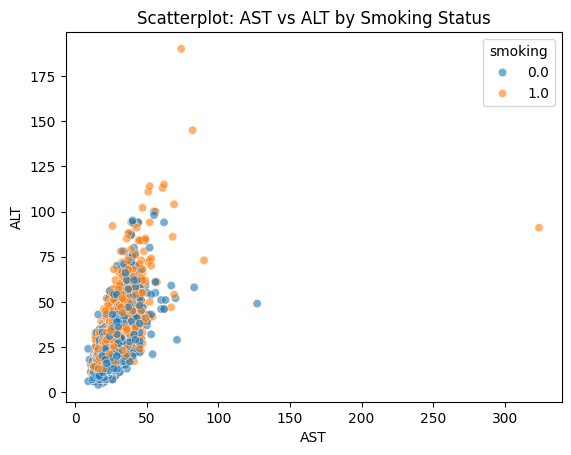

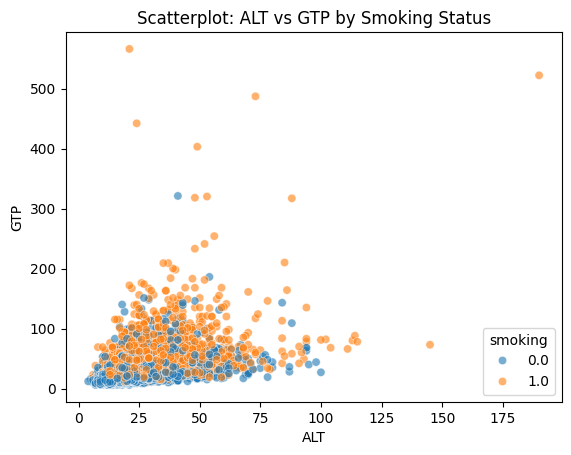

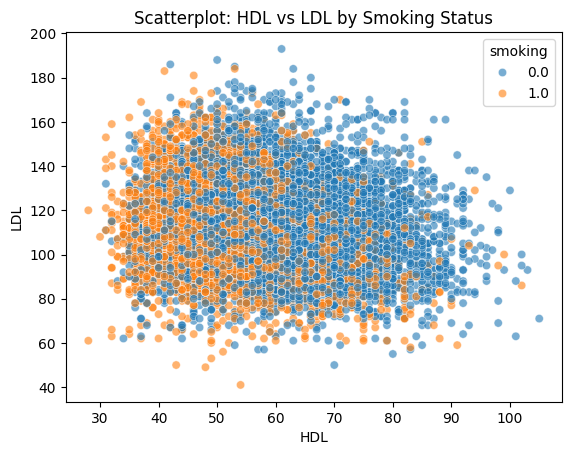

In [21]:
sns.scatterplot(x='AST', y='ALT', hue='smoking', data=df, alpha=0.6)
plt.title('Scatterplot: AST vs ALT by Smoking Status')
plt.xlabel('AST')
plt.ylabel('ALT')
plt.show()

sns.scatterplot(x='ALT', y='Gtp', hue='smoking', data=df, alpha=0.6)
plt.title('Scatterplot: ALT vs GTP by Smoking Status')
plt.xlabel('ALT')
plt.ylabel('GTP')
plt.show()

sns.scatterplot(x='HDL', y='LDL', hue='smoking', data=df, alpha=0.6)
plt.title('Scatterplot: HDL vs LDL by Smoking Status')
plt.xlabel('HDL')
plt.ylabel('LDL')
plt.show()


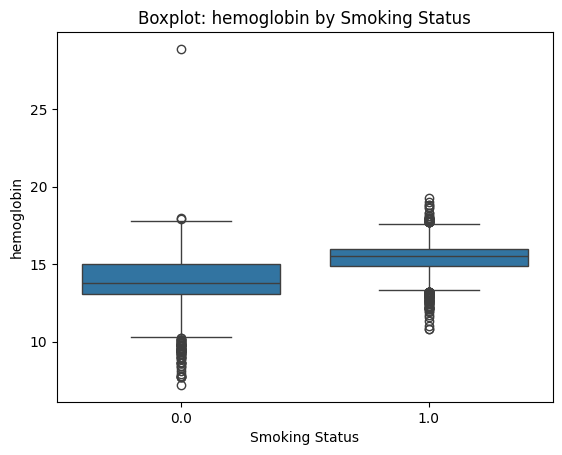

In [23]:
sns.boxplot(x='smoking', y='hemoglobin', data=df)
plt.title('Boxplot: hemoglobin by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('hemoglobin')
plt.show()


**Составим матрицу корреляций**


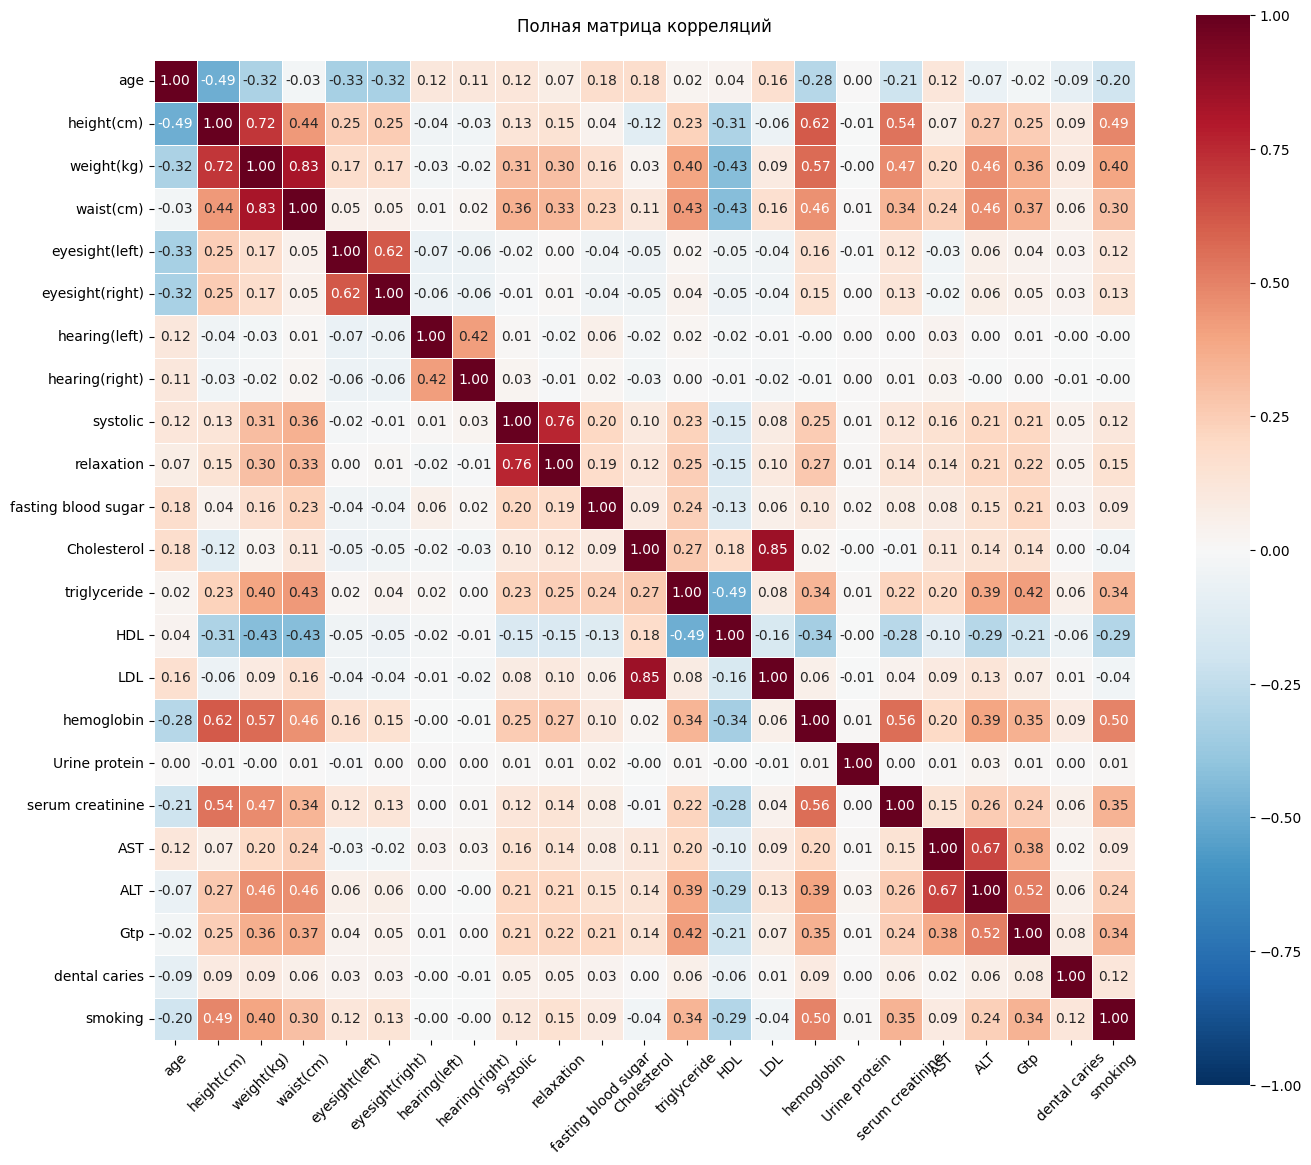

In [24]:
corr_matrix = df.drop(columns='id').corr()

plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix, 
    annot=True,          
    fmt=".2f",          
    cmap='RdBu_r',      
    vmin=-1, vmax=1,    
    center=0,          
    linewidths=.5,      
    square=True         
)
plt.title('Полная матрица корреляций', pad=20)
plt.xticks(rotation=45)  
plt.yticks(rotation=0)   
plt.tight_layout()       
plt.show()

**Бэггинг**

In [31]:
from sklearn.base import clone
import numpy as np

class MyBaggingClassifier:
    """
    Параметры:
    - base_model: базовая модель для ансамбля
    - n_models: количество моделей в ансамбле
    - random_state: случайное состояние для воспроизводимости
    """
    def __init__(self, base_model, n_models=1, random_state=None):
        self.base_model = base_model
        self.n_models = n_models
        self.models = []
        self.random_state = random_state

    def fit(self, X, y):
        
        np.random.seed(self.random_state)
        self.models = [] 
        n_samples = len(X)

        for _ in range(self.n_models):
            sample_indices = np.random.choice(n_samples, size=n_samples, replace=True)

            if isinstance(X, np.ndarray):
                X_sample = X[sample_indices]
                y_sample = y[sample_indices]
            else:
                X_sample = X.iloc[sample_indices]
                y_sample = y.iloc[sample_indices]

            # Создаём и обучаем копию модели
            model = clone(self.base_model)
            model.fit(X_sample, y_sample)
            self.models.append(model)

    def predict_proba(self, X):
        
        all_probas = [model.predict_proba(X) for model in self.models]
        mean_probas = np.mean(all_probas, axis=0)
        return mean_probas

    def predict(self, X):
        
        mean_probas = self.predict_proba(X)
        return np.argmax(mean_probas, axis=1)


In [34]:
#данные
from sklearn.model_selection import train_test_split

X = df.drop(['id', 'smoking'], axis=1)
y = df['smoking']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_test = df_test.drop('id', axis=1)

**Кастомный и sklearn бэггинг**

In [46]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score

base_model = DecisionTreeClassifier(max_depth=5)
my_bagging = MyBaggingClassifier(base_model=base_model, n_models=15, random_state=42)
my_bagging.fit(X_train, y_train)
my_pred = my_bagging.predict_proba(X_val)[:, 1]

sklearn_bagging = BaggingClassifier(base_model, n_estimators=15, random_state=42)
sklearn_bagging.fit(X_train, y_train)
sklearn_pred = sklearn_bagging.predict_proba(X_val)[:, 1]

print(f"\nMy Bagging ROC-AUC: {roc_auc_score(y_val, my_pred):.4f}")
print(f"Sklearn Bagging ROC-AUC: {roc_auc_score(y_val, sklearn_pred):.4f}")


My Bagging ROC-AUC: 0.8700
Sklearn Bagging ROC-AUC: 0.8688


Бэггинги показывают похожие результаты

**Градиентный бустинг**

In [44]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MyGradientBoosting(BaseEstimator, ClassifierMixin):
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=5, random_state=None):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.random_state = random_state
        self.models = []
        self.initial_pred = None

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        np.random.seed(self.random_state)
        self.models.clear()
        pos_ratio = np.clip(np.mean(y), 1e-6, 1 - 1e-6)
        self.initial_pred = np.log(pos_ratio / (1 - pos_ratio))
        pred = np.full(X.shape[0], self.initial_pred)

        for _ in range(self.n_estimators):
            residuals = y - self._sigmoid(pred)
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
            tree.fit(X, residuals)
            self.models.append(tree)
            pred += self.learning_rate * tree.predict(X)

        return self

    def predict_proba(self, X):
        pred = np.full(X.shape[0], self.initial_pred)
        for model in self.models:
            pred += self.learning_rate * model.predict(X)
        proba = self._sigmoid(pred)
        return np.column_stack((1 - proba, proba))

    def predict(self, X):
        proba = self.predict_proba(X)[:, 1]
        return (proba >= 0.5).astype(int)


**Кастомный и sklearn бустинг**

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

my_gb = MyGradientBoosting(n_estimators=150, learning_rate=0.1, max_depth=5, random_state=0)
my_gb.fit(X_train, y_train)
my_pred = my_gb.predict_proba(X_val)[:, 1]
sklearn_gb = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=5, random_state=0)
sklearn_gb.fit(X_train, y_train)
sklearn_pred = sklearn_gb.predict_proba(X_val)[:, 1]

print(f"\nMy GB ROC-AUC: {roc_auc_score(y_val, my_pred):.4f}")
print(f"Sklearn GB ROC-AUC: {roc_auc_score(y_val, sklearn_pred):.4f}")


My GB ROC-AUC: 0.8855
Sklearn GB ROC-AUC: 0.8904


**Сравнения бустинга**

In [55]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
def compare_boosters(X_train, y_train, X_val, y_val):
 
    models = {
        "Sklearn GB": GradientBoostingClassifier(random_state=0),
        "XGBoost": XGBClassifier(random_state=0, eval_metric='logloss'),
        "LightGBM": LGBMClassifier(random_state=0),
        "CatBoost": CatBoostClassifier(random_state=0, verbose=0)
    }

    results = []

    print("Сравнение моделей по ROC-AUC:\n")
    for name, model in models.items():
        model.fit(X_train, y_train)                       
        pred_proba = model.predict_proba(X_val)[:, 1]    
        auc_score = roc_auc_score(y_val, pred_proba)     
        results.append((name, auc_score))
        print(f"{name:<12} | ROC-AUC = {auc_score:.4f}")

   
    best_model_name, best_auc = max(results, key=lambda x: x[1])

    print("\nЛучший результат:")
    print(f"Модель: {best_model_name}")
    print(f"ROC-AUC: {best_auc:.4f}")

    return best_model_name, best_auc


best_model, best_score = compare_boosters(X_train, y_train, X_val, y_val)


Сравнение моделей по ROC-AUC:

Sklearn GB   | ROC-AUC = 0.8898
XGBoost      | ROC-AUC = 0.8803
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4359, number of negative: 7641
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000798 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1439
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.363250 -> initscore=-0.561286
[LightGBM] [Info] Start training from score -0.561286
LightGBM     | ROC-AUC = 0.8911
CatBoost     | ROC-AUC = 0.8910

Лучший результат:
Модель: LightGBM
ROC-AUC: 0.8911


**Подбор гиперпараметров**

In [62]:
import optuna
from sklearn.model_selection import StratifiedKFold

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 500, 3000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3, log=True),
        'depth': trial.suggest_int('depth', 4, 12),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-4, 20.0, log=True),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_strength': trial.suggest_float('random_strength', 0.1, 2.0),
        'grow_policy': trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 100),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'auto_class_weights': trial.suggest_categorical('auto_class_weights', ['Balanced', 'None']),
        'max_ctr_complexity': trial.suggest_int('max_ctr_complexity', 1, 8)
    }

    n_splits = 3
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []
    
    for train_idx, val_idx in cv.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model = CatBoostClassifier(
            **params,
            eval_metric='AUC',
            early_stopping_rounds=100,
            thread_count=4,
            verbose=0,
            random_state=42
        )
        
        model.fit(
            X_train, y_train,
            eval_set=(X_val, y_val),
            use_best_model=True
        )
        
        y_pred = model.predict_proba(X_val)[:, 1]
        scores.append(roc_auc_score(y_val, y_pred))

    return np.mean(scores)

study = optuna.create_study(
    direction='maximize',
    sampler=optuna.samplers.TPESampler(seed=42),
    pruner=optuna.pruners.HyperbandPruner()
)

study.optimize(objective, n_trials=20, timeout=3600)

print("\nBest trial:")
trial = study.best_trial
print(f"  ROC-AUC: {trial.value:.4f}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

best_params = trial.params.copy()
best_params.update({
    'eval_metric': 'AUC',
    'early_stopping_rounds': 100,
    'thread_count': 4,
    'random_state': 42,
    'verbose': 0
})

res_model = CatBoostClassifier(**best_params)
res_model.fit(X, y)

[I 2025-05-26 00:16:07,317] A new study created in memory with name: no-name-314448b0-86f6-4e3c-9f8d-8501ffc898c2
[I 2025-05-26 00:16:11,834] Trial 0 finished with value: 0.87380166661183 and parameters: {'iterations': 1436, 'learning_rate': 0.22648248189516848, 'depth': 10, 'l2_leaf_reg': 0.14910993534221184, 'border_count': 66, 'random_strength': 0.39638958863878504, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 71, 'bagging_temperature': 0.020584494295802447, 'auto_class_weights': 'Balanced', 'max_ctr_complexity': 2}. Best is trial 0 with value: 0.87380166661183.
[I 2025-05-26 00:16:26,794] Trial 1 finished with value: 0.8790912008400872 and parameters: {'iterations': 954, 'learning_rate': 0.002846526357761094, 'depth': 6, 'l2_leaf_reg': 0.06049919340010417, 'border_count': 128, 'random_strength': 0.6533353663762795, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 37, 'bagging_temperature': 0.45606998421703593, 'auto_class_weights': 'Balanced', 'max_ctr_complexity': 5}. Best i


Best trial:
  ROC-AUC: 0.8872
  Params: 
    iterations: 2119
    learning_rate: 0.005993384706325005
    depth: 7
    l2_leaf_reg: 8.921821704807913
    border_count: 211
    random_strength: 1.271507824034891
    grow_policy: Depthwise
    min_data_in_leaf: 19
    bagging_temperature: 0.5650539515627094
    auto_class_weights: None
    max_ctr_complexity: 5


**CSV**

In [64]:
result = res_model.predict_proba(X_test.values)[:, 1]

csv = pd.DataFrame({
    'id': df_test['id'],
    'smoking': result
})

csv.to_csv('submission.csv', index=False)

**Метрики**

In [67]:

from sklearn.metrics import (accuracy_score, precision_score, 
                           recall_score, f1_score, 
                           roc_auc_score, average_precision_score)

def custom_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def custom_precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp) if (tp + fp) > 0 else 0

def custom_recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn) if (tp + fn) > 0 else 0

def custom_f1(y_true, y_pred):
    precision = custom_precision(y_true, y_pred)
    recall = custom_recall(y_true, y_pred)
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
def custom_roc_auc(y_true, y_scores):
    thresholds = np.sort(np.unique(y_scores))[::-1]
    tpr, fpr = [], []

    for thresh in thresholds:
        y_pred = (y_scores >= thresh).astype(int)
        tp = np.sum((y_true == 1) & (y_pred == 1))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        fn = np.sum((y_true == 1) & (y_pred == 0))
        tn = np.sum((y_true == 0) & (y_pred == 0))

        tpr.append(tp / (tp + fn) if (tp + fn) > 0 else 0)
        fpr.append(fp / (fp + tn) if (fp + tn) > 0 else 0)

    auc = 0
    for i in range(1, len(thresholds)):
        auc += (fpr[i] - fpr[i-1]) * (tpr[i] + tpr[i-1]) / 2

    return auc

# Получаем предсказания модели
y_pred = res_model.predict(X_val)
y_scores = res_model.predict_proba(X_val)[:, 1]

# Выводим сравнение метрик
print("╔══════════════════════════════════════════╗")
print("║          Сравнение метрик               ║")
print("╠══════════════════════╦════════╦═════════╣")
print("║       Метрика        ║ Custom ║ Sklearn ║")
print("╠══════════════════════╬════════╬═════════╣")
print(f"║ Accuracy            ║ {custom_accuracy(y_val, y_pred):.4f} ║ {accuracy_score(y_val, y_pred):.4f}  ║")
print(f"║ Precision           ║ {custom_precision(y_val, y_pred):.4f} ║ {precision_score(y_val, y_pred):.4f}  ║")
print(f"║ Recall              ║ {custom_recall(y_val, y_pred):.4f} ║ {recall_score(y_val, y_pred):.4f}  ║")
print(f"║ F1-score            ║ {custom_f1(y_val, y_pred):.4f} ║ {f1_score(y_val, y_pred):.4f}  ║")
print(f"║ ROC-AUC             ║ {custom_roc_auc(y_val, y_scores):.4f} ║ {roc_auc_score(y_val, y_scores):.4f}  ║")
print(f"║ PR-AUC              ║ {'-':^6} ║ {average_precision_score(y_val, y_scores):.4f}  ║")
print("╚══════════════════════╩════════╩═════════╝")

╔══════════════════════════════════════════╗
║          Сравнение метрик               ║
╠══════════════════════╦════════╦═════════╣
║       Метрика        ║ Custom ║ Sklearn ║
╠══════════════════════╬════════╬═════════╣
║ Accuracy            ║ 0.8773 ║ 0.8773  ║
║ Precision           ║ 0.8238 ║ 0.8238  ║
║ Recall              ║ 0.8614 ║ 0.8614  ║
║ F1-score            ║ 0.8422 ║ 0.8422  ║
║ ROC-AUC             ║ 0.9491 ║ 0.9491  ║
║ PR-AUC              ║   -    ║ 0.9181  ║
╚══════════════════════╩════════╩═════════╝
